In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pyprocessmacro import Process
import statsmodels.api as sm

/Users/min/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/Users/min/.pyenv/versions/anaconda3-2019.10/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [13]:
import matplotlib
matplotlib.rc('font', family='AppleGothic')  
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_excel("climate_survey-2023.xlsx")

/Users/min/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/xlrd/xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
/Users/min/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/xlrd/xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [4]:
df = df.dropna()

In [5]:
X_cols = ['concern', 
          'aware_cause', 'aware_solve', 'aware_tot', 
           'satis_mean2', 
           'risk', 'risk_me', 'impact_n', 'import_me',
           'eco_at', 'prior_eco',
           'behave_me', 'behave_other', 
           'control_n']
damage_cols = ['damage_me', 'damage_family', 'damage_commun', 
               'damage_country', 'damage_country_high', 'damage_country_low', #damage_country
               'damage_future', 'damage_org']
psychological_cols = ['distance_index', 'distance_weighted']
motive_cols = ['motive_profit', 'motive_norm', 'motive_pleasure', 
                'motive_bio', 'motive_selfish', 'motive_prosocial', 
                'motive_selfinterest', 'motive_environmental',
                'motive_me', 'motive_com']
Y_cols = ['prac_tot', 'prac_tot2', 'prac_ratio', 'prac_intent']
C_cols = ['sex', 'age', 'area', 'edu', 'job', 'child', 'income', 'pol', 
           'media_trust', 'life_satis']

In [6]:
data = df[X_cols + motive_cols + Y_cols + C_cols]

In [7]:
data['motive_socialinterest'] = data['motive_norm'] + data['motive_prosocial']
data['motive_diff_self_soc'] = data['motive_selfish'] - data['motive_prosocial']
data['motive_diff_soc_self'] = data['motive_prosocial'] - data['motive_selfish']
data['motive_diff_self_env'] = data['motive_selfinterest'] - data['motive_environmental']
data['motive_diff_env_self'] = data['motive_environmental'] - data['motive_selfinterest']

/Users/min/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/min/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/min/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [8]:
center_cols = ['concern', 'aware_cause', 'aware_solve', 
                 "satis_mean2", "aware_tot", 
                 "risk", "risk_me", "impact_n", 'import_me',
                 'eco_at', 'prior_eco',
                 'behave_me', 'behave_other',
                 'control_n', 
                 "prac_tot", "prac_tot2", "prac_intent", 
                 "age", "edu", "income", "pol", 
                 'media_trust', 'life_satis']
data_centered = data.copy()

In [9]:
data_centered[center_cols + motive_cols] = data_centered[center_cols + motive_cols].apply(lambda x: x - x.mean())
data_centered.head()

,concern,aware_cause,aware_solve,aware_tot,satis_mean2,risk,risk_me,impact_n,import_me,eco_at,...,child,income,pol,media_trust,life_satis,motive_socialinterest,motive_diff_self_soc,motive_diff_soc_self,motive_diff_self_env,motive_diff_env_self
0,0.175035,-0.527197,-0.33159,2.062762,0.285477,-0.124826,-0.642259,-2.27371,-1.102859,0.349721,...,1,4.76046,1.037657,-0.949093,3.29742,18,-1,1,-1,1
1,-0.824965,0.472803,-0.33159,-1.937238,0.487497,-0.124826,-0.642259,0.72629,-0.102859,0.349721,...,0,-1.23954,1.037657,1.050907,-1.70258,15,0,0,-2,2
2,-1.824965,-0.527197,-0.33159,2.062762,0.184467,-0.124826,0.357741,0.72629,-0.102859,0.349721,...,1,-1.23954,0.037657,0.050907,-0.70258,18,-1,1,-1,1
3,0.175035,0.472803,0.66841,-0.937238,0.285477,0.875174,1.357741,0.72629,0.897141,-1.650279,...,0,5.76046,-0.962343,1.050907,0.29742,18,0,0,-6,6
4,0.175035,0.472803,-0.33159,-4.937238,-0.512503,-0.124826,0.357741,0.72629,0.897141,1.349721,...,1,0.76046,1.037657,1.050907,1.29742,19,0,0,-2,2


In [10]:
data_centered['eco_at_centered'] = data_centered['eco_at']
data_centered['eco_at'] = data['eco_at']

In [11]:
X_col = 'aware_tot'
X_cols = ['concern', 'aware_cause', 
           'satis_mean2', 
           'risk', 'risk_me', 'impact_n', 'import_me',
           'eco_at', 'prior_eco',
           'control_n']
M_cols = ['eco_at']
Y_col = 'prac_ratio'
C_cols = ['sex', 'age', 'child', 'income', 'pol', 
          'media_trust', 'life_satis']
motive_cols = ['motive_profit', 'motive_norm', 'motive_pleasure', 
                'motive_bio', 'motive_selfish', 'motive_prosocial']

## Linear Regression

In [39]:
Y = data_centered['prac_ratio']
X = data_centered[X_cols + motive_cols + C_cols]

X = sm.add_constant(X)

# linear regression
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             prac_ratio   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     54.67
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.85e-234
Time:                        14:51:58   Log-Likelihood:                 325.69
No. Observations:                2868   AIC:                            -595.4
Df Residuals:                    2840   BIC:                            -428.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5043      0.018  

/Users/min/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
coefficients = model.params[1:]  # 비표준화 계수 (상수 제외)
std_X = X.std(axis=0)
std_Y = Y.std()

std_coefficients = coefficients * (std_X / std_Y)

print(std_coefficients)

age                 0.030571
aware_cause         0.009658
aware_solve         0.031885
aware_tot           0.115935
behave_me          -0.020845
behave_other        0.095798
child               0.001416
concern             0.030704
const                    NaN
control_n          -0.029792
eco_at              0.207555
impact_n            0.045916
import_me          -0.042843
income             -0.003980
life_satis          0.016227
media_trust         0.012485
motive_bio         -0.030007
motive_norm         0.009644
motive_pleasure     0.020512
motive_profit       0.240286
motive_prosocial    0.090500
motive_selfish      0.035987
pol                 0.020678
prior_eco           0.091039
risk                0.014751
risk_me             0.000569
satis_mean2        -0.029220
sex                 0.019831
dtype: float64


## Process Macro

### 매개모형

In [40]:
process = Process(data=data_centered, y=Y_col, x=X_col, m=M_cols, model=4)
results = process.summary()
print(results)

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    y = prac_ratio
    x = aware_tot
    m1 = eco_at

Sample size:
2868

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = prac_ratio 
OLS Regression Summary

     R²  Adj. R²    MSE        F  df1   df2  p-value
 0.2101   0.2093 0.0561 381.0365    2  2865   0.0000

Coefficients

           coeff     se       t      p   LLCI   ULCI
Cons      0.3429 0.0153 22.3973 0.0000 0.3129 0.3729
aware_tot 0.0129 0.0013 10.0851 0.0000 0.0104 0.0154
eco_at    0.0953 0.0040 23.7323 0.0000 0.0874 0.1032

-------------------------------------------------------------------------

Outcome = eco_at 
OLS Regressio

In [41]:
process = Process(data=data_centered, y=Y_col, x=X_col, m=M_cols, 
                  cov=C_cols, model=4)
results = process.summary()
print(results)

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    y = prac_ratio
    x = aware_tot
    m1 = eco_at

Sample size:
2868

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = prac_ratio 
OLS Regression Summary

     R²  Adj. R²    MSE        F  df1   df2  p-value
 0.2101   0.2093 0.0561 381.0365    2  2865   0.0000

Coefficients

           coeff     se       t      p   LLCI   ULCI
Cons      0.3429 0.0153 22.3973 0.0000 0.3129 0.3729
aware_tot 0.0129 0.0013 10.0851 0.0000 0.0104 0.0154
eco_at    0.0953 0.0040 23.7323 0.0000 0.0874 0.1032

-------------------------------------------------------------------------

Outcome = eco_at 
OLS Regressio

#### 조절된 매개모형

##### 조절: X->M

In [42]:
process = Process(data=data_centered, y=Y_col, x=X_col, m=M_cols, 
                  w="motive_diff_env_self", 
                  cov=C_cols, model=7)
results = process.summary()
print(results)

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 7

Variables:
    Cons = Cons
    y = prac_ratio
    x = aware_tot
    m1 = eco_at
    w = motive_diff_env_self

Sample size:
2868

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = prac_ratio 
OLS Regression Summary

     R²  Adj. R²    MSE        F  df1   df2  p-value
 0.2101   0.2093 0.0561 381.0365    2  2865   0.0000

Coefficients

           coeff     se       t      p   LLCI   ULCI
Cons      0.3429 0.0153 22.3973 0.0000 0.3129 0.3729
aware_tot 0.0129 0.0013 10.0851 0.0000 0.0104 0.0154
eco_at    0.0953 0.0040 23.7323 0.0000 0.0874 0.1032

-------------------------------------------------------------------------

Ou

##### 조절: M->Y

In [43]:
process = Process(data=data_centered, y=Y_col, x=X_col, m=M_cols, 
                  v="motive_diff_env_self", 
                  cov=C_cols, model=14)
results = process.summary()
print(results)

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 14

Variables:
    Cons = Cons
    y = prac_ratio
    x = aware_tot
    m1 = eco_at
    v = motive_diff_env_self

Sample size:
2868

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = prac_ratio 
OLS Regression Summary

     R²  Adj. R²    MSE        F  df1   df2  p-value
 0.2246   0.2233 0.0551 207.3406    4  2863   0.0000

Coefficients

                              coeff     se       t      p    LLCI    ULCI
Cons                         0.3066 0.0201 15.2646 0.0000  0.2672  0.3459
aware_tot                    0.0127 0.0013 10.0407 0.0000  0.0103  0.0152
motive_diff_env_self         0.0164 0.0056  2.9539 0.0032  0.0055  

##### 조절: M->Y & X->Y

In [44]:
process = Process(data=data_centered, y=Y_col, x=X_col, m=M_cols, 
                  v="motive_diff_env_self", 
                  cov=C_cols, model=15)
results = process.summary()
print(results)

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 15

Variables:
    Cons = Cons
    y = prac_ratio
    x = aware_tot
    m1 = eco_at
    v = motive_diff_env_self

Sample size:
2868

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = prac_ratio 
OLS Regression Summary

     R²  Adj. R²    MSE        F  df1   df2  p-value
 0.2249   0.2233 0.0551 166.1174    5  2862   0.0000

Coefficients

                                 coeff     se       t      p    LLCI    ULCI
Cons                            0.3090 0.0202 15.2919 0.0000  0.2694  0.3486
aware_tot                       0.0140 0.0017  8.2369 0.0000  0.0106  0.0173
motive_diff_env_self            0.0156 0.0056  2.7754 0.00

### 시각화

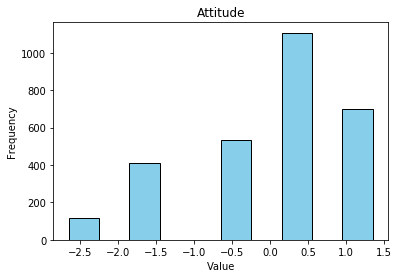

In [29]:
plt.hist(data_centered['eco_at'], bins=10, color='skyblue', edgecolor='black')
plt.title('Attitude')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 그래프 출력
plt.show()

In [49]:
eco_at_avg = data['eco_at'].mean()
eco_at_sd = data['eco_at'].std()

print(f"average: {eco_at_avg}")
print(f"sd: {eco_at_sd}")
# print(eco_at_avg - eco_at_sd, eco_at_avg + eco_at_sd)

average: 3.650278940027894
sd: 1.1159230221822412


In [51]:
motive_avg = data['motive_diff_env_self'].mean()
motive_sd = data['motive_diff_env_self'].std()

print(f"average: {motive_avg}")
print(f"sd: {motive_sd}")
print(motive_avg - motive_sd, motive_avg + motive_sd)

average: 2.3912133891213387
sd: 2.452411281640314
-0.06119789251897512 4.843624670761653


### 독립변인과 매개변인의 관계

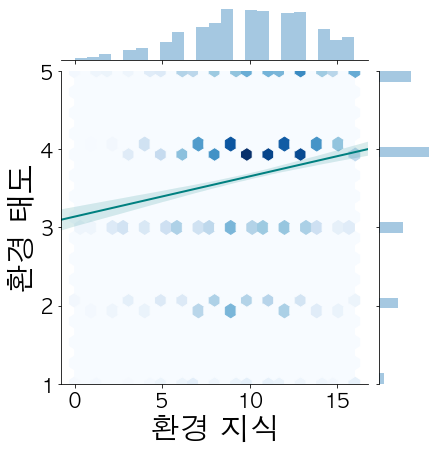

In [ ]:
from matplotlib.ticker import MaxNLocator
g = sns.jointplot(x='aware_tot', y='eco_at', data=data, 
                  kind='hex', cmap="Blues")

sns.regplot(
    x='aware_tot', 
    y='eco_at', 
    data=df, 
    scatter=False,  
    ax=g.ax_joint,  
    line_kws={'color': 'teal', 'lw': 2}
)

g.set_axis_labels('환경 지식', '환경 태도', fontsize=30)
g.ax_joint.tick_params(axis='both', which='major', labelsize=20)

plt.show()

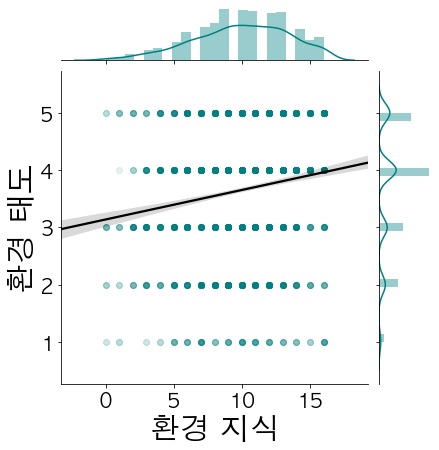

In [ ]:
sns.jointplot(x='aware_tot', 
              y='eco_at', 
              data=data, 
              kind='reg', 
              color='teal', 
              scatter_kws={'alpha': 0.1}, 
              line_kws={'color': 'black'})

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('환경 지식', fontsize=30) 
plt.ylabel('환경 태도', fontsize=30) 

plt.show()

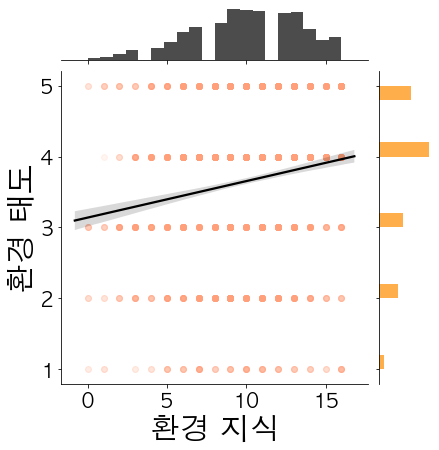

In [43]:
g = sns.JointGrid(x=data['aware_tot'], y=data['eco_at'])

g.plot_joint(
    sns.regplot, 
    scatter_kws={'alpha': 0.1, 'color': 'LightSalmon'}, 
    line_kws={'color': 'black'}
)

g.ax_marg_x.hist(data['aware_tot'], bins=20, color='black', alpha=0.7)
g.ax_marg_y.hist(data['eco_at'], bins=20, color='darkorange', alpha=0.7, orientation='horizontal')

g.ax_joint.set_xlabel('환경 지식', fontsize=30)
g.ax_joint.set_ylabel('환경 태도', fontsize=30)

plt.tick_params(axis='both', which='major', labelsize=20)

plt.show()

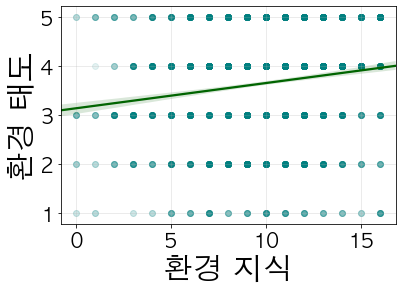

In [158]:
sns.regplot(x='aware_tot', 
            y='eco_at', 
            data=data, 
            color='teal', 
            scatter_kws={'alpha': 0.1}, 
            line_kws={'color': 'darkgreen'})

plt.yticks(np.arange(1, 6, 1))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('환경 지식', fontsize=30) 
plt.ylabel('환경 태도', fontsize=30) 

plt.grid(True, alpha=0.3)
plt.show()

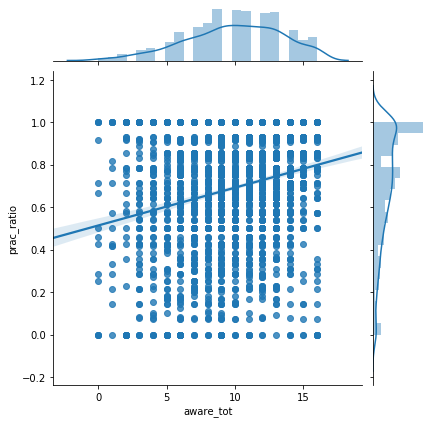

In [ ]:
sns.jointplot(x='aware_tot', 
              y='prac_ratio', 
              data=data, 
              kind='reg')
plt.show()

#### 조절된 매개효과
##### socialinterest - selfinterest
M->Y에서 조절효과

In [23]:
# predict data
X = np.linspace(1, 5, 100)
Z_low = 0
Z_mid = 2
Z_high = 4
## beta
beta_0 = 0.6981
beta_1 = 0.0989
beta_2 = -0.0122
beta_3 = -0.0057

# Y_low = 0.3090 + 0.1119 * X + 0.0156 * Z_low + -0.0074 * (X*Z_low)
# Y_mid = 0.3090 + 0.1119 * X + 0.0156 * Z_mid + -0.0074 * (X*Z_mid)
# Y_high = 0.3090 + 0.1119 * X + 0.0156 * Z_high + -0.0074 * (X*Z_high)

Y_low = beta_0 + beta_1 * X + beta_2 * Z_low + beta_3 * (X*Z_low)
Y_mid = beta_0 + beta_1 * X + beta_2 * Z_mid + beta_3 * (X*Z_mid)
Y_high = beta_0 + beta_1 * X + beta_2 * Z_high + beta_3 * (X*Z_high)

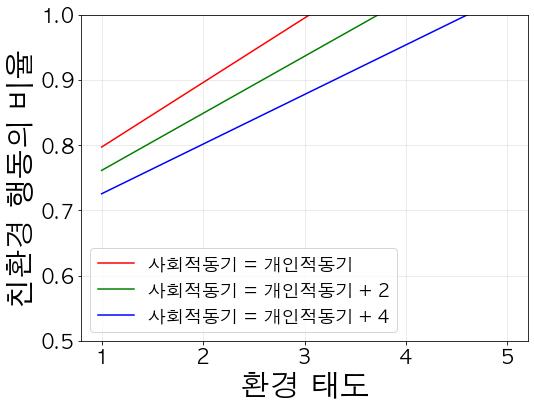

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, label='사회적동기 = 개인적동기', color='red')
plt.plot(X, Y_mid, label='사회적동기 = 개인적동기 + 2', color='green')
plt.plot(X, Y_high, label='사회적동기 = 개인적동기 + 4', color='blue')

plt.ylim(0.5, 1.0)
plt.xticks(np.arange(1, 6, 1))

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('환경 태도', fontsize=30)
plt.ylabel('친환경 행동의 비율', fontsize=30)
# plt.title("Moderating Effect of 'Motive Difference (Social - Self)' \non the Relationship between 'Eco Attitude' and 'Eco-friendly Behavior'")
plt.legend(fontsize=18)
plt.grid(True, alpha=0.3)
plt.show()

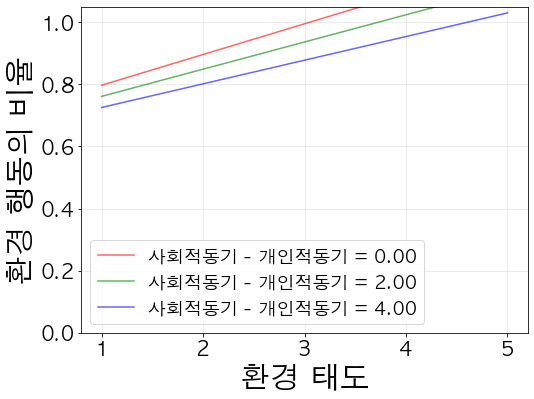

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, 
         label=f'사회적동기 - 개인적동기 = {Z_low:.2f}', 
         color='red', alpha=0.6)
plt.plot(X, Y_mid, 
         label=f'사회적동기 - 개인적동기 = {Z_mid:.2f}', 
         color='green', alpha=0.6)
plt.plot(X, Y_high, 
         label=f'사회적동기 - 개인적동기 = {Z_high:.2f}', 
         color='blue', alpha=0.6)

plt.ylim(0, 1.05)
plt.xticks(np.arange(1, 6, 1))

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('환경 태도', fontsize=30)
plt.ylabel('환경 행동의 비율', fontsize=30)
# plt.title("Moderating Effect of 'Motive Difference (Social - Self)' \non the Relationship between 'Eco Attitude' and 'Eco-friendly Behavior'")
plt.legend(fontsize=18)
plt.grid(True, alpha=0.3)
plt.show()

In [93]:
# predict data
X = np.linspace(1, 5, 100)
Z_low = -4
Z_mid = -2
Z_high = 0
## beta
beta_0 = 0.6981
beta_1 = 0.0989
beta_2 = 0.0122
beta_3 = 0.0057

# Y_low = 0.3090 + 0.1119 * X + 0.0156 * Z_low + -0.0074 * (X*Z_low)
# Y_mid = 0.3090 + 0.1119 * X + 0.0156 * Z_mid + -0.0074 * (X*Z_mid)
# Y_high = 0.3090 + 0.1119 * X + 0.0156 * Z_high + -0.0074 * (X*Z_high)

Y_low = beta_0 + beta_1 * X + beta_2 * Z_low + beta_3 * (X*Z_low)
Y_mid = beta_0 + beta_1 * X + beta_2 * Z_mid + beta_3 * (X*Z_mid)
Y_high = beta_0 + beta_1 * X + beta_2 * Z_high + beta_3 * (X*Z_high)

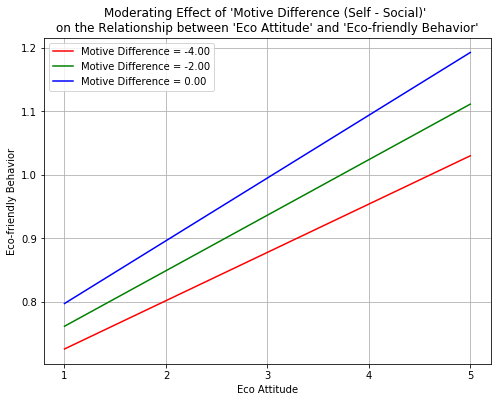

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, label=f'개인적동기 - 사회적동기 = {Z_low:.2f}', color='red')
plt.plot(X, Y_mid, label=f'개인적동기 - 사회적동기 = {Z_mid:.2f}', color='green')
plt.plot(X, Y_high, label=f'개인적동기 - 사회적동기 = {Z_high:.2f}', color='blue')

plt.xticks(np.arange(1, 6, 1))
plt.xlabel('Eco Attitude')
plt.ylabel('Eco-friendly Behavior')
plt.title("Moderating Effect of 'Motive Difference (Self - Social)' \non the Relationship between 'Eco Attitude' and 'Eco-friendly Behavior'")
plt.legend()
plt.grid(True)
plt.show()

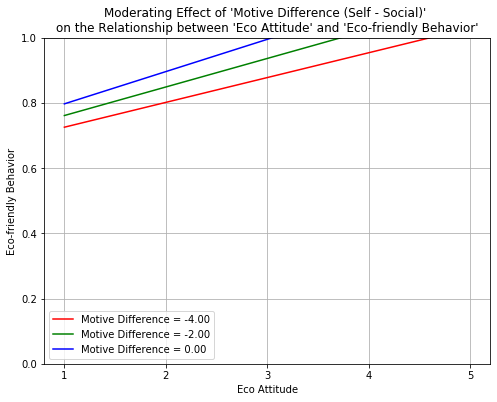

In [95]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, label=f'Motive Difference = {Z_low:.2f}', color='red')
plt.plot(X, Y_mid, label=f'Motive Difference = {Z_mid:.2f}', color='green')
plt.plot(X, Y_high, label=f'Motive Difference = {Z_high:.2f}', color='blue')

plt.ylim(0, 1)
plt.xticks(np.arange(1, 6, 1))

plt.xlabel('Eco Attitude')
plt.ylabel('Eco-friendly Behavior')
plt.title("Moderating Effect of 'Motive Difference (Self - Social)' \non the Relationship between 'Eco Attitude' and 'Eco-friendly Behavior'")
plt.legend()
plt.grid(True)
plt.show()

##### Selfinterest
M->Y에서 조절효과

In [197]:
motive_avg = data['motive_selfinterest'].mean()
motive_sd = data['motive_selfinterest'].std()
# predict data
X = np.linspace(1, 5, 100)
Z_low = 0 - motive_sd
Z_mid = 0
Z_high = 0 + motive_sd
## beta
beta_0 = 0.6892
beta_1 = 0.0624
beta_2 = 0.0224
beta_3 = -0.0043

# Y_low = 0.3090 + 0.1119 * X + 0.0156 * Z_low + -0.0074 * (X*Z_low)
# Y_mid = 0.3090 + 0.1119 * X + 0.0156 * Z_mid + -0.0074 * (X*Z_mid)
# Y_high = 0.3090 + 0.1119 * X + 0.0156 * Z_high + -0.0074 * (X*Z_high)

Y_low = beta_0 + beta_1 * X + beta_2 * Z_low + beta_3 * (X*Z_low)
Y_mid = beta_0 + beta_1 * X + beta_2 * Z_mid + beta_3 * (X*Z_mid)
Y_high = beta_0 + beta_1 * X + beta_2 * Z_high + beta_3 * (X*Z_high)

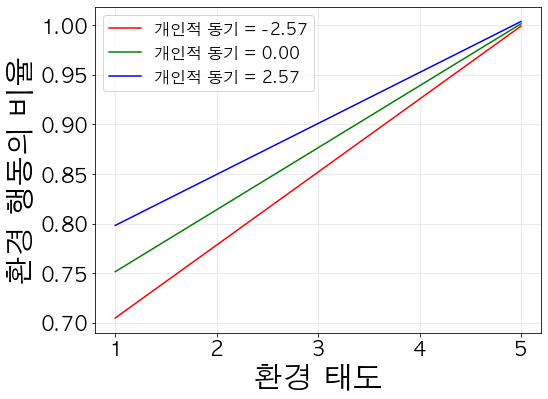

In [200]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, label=f'개인적 동기 = {Z_low:.2f}', color='red')
plt.plot(X, Y_mid, label=f'개인적 동기 = {Z_mid:.2f}', color='green')
plt.plot(X, Y_high, label=f'개인적 동기 = {Z_high:.2f}', color='blue')

plt.xticks(np.arange(1, 6, 1))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('환경 태도', fontsize=30)
plt.ylabel('환경 행동의 비율', fontsize=30)
# plt.title("Moderating Effect of 'Selfinterest Motive' \non the Relationship between 'Eco Attitude' and 'Eco-friendly Behavior'")
plt.legend(fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()

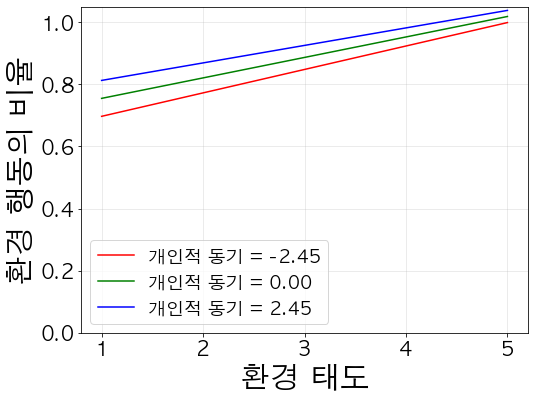

In [196]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, label=f'개인적 동기 = {Z_low:.2f}', color='red')
plt.plot(X, Y_mid, label=f'개인적 동기 = {Z_mid:.2f}', color='green')
plt.plot(X, Y_high, label=f'개인적 동기 = {Z_high:.2f}', color='blue')

plt.ylim(0, 1.05)
plt.xticks(np.arange(1, 6, 1))

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('환경 태도', fontsize=30)
plt.ylabel('환경 행동의 비율', fontsize=30)
# plt.title("Moderating Effect of 'Selfinterest Motive' \non the Relationship between 'Eco Attitude' and 'Eco-friendly Behavior'")
plt.legend(fontsize=18)
plt.grid(True, alpha=0.3)
plt.show()

M->Y & X->Y에서 조절효과
###### M->Y

In [121]:
motive_avg = data['motive_selfinterest'].mean()
motive_sd = data['motive_selfinterest'].std()
# predict data
X = np.linspace(1, 5, 100)
Z_low = 0 - motive_sd
Z_mid = 0
Z_high = 0 + motive_sd
## beta
beta_0 = 0.6900
beta_1 = 0.0629
beta_2 = 0.0336
beta_3 = -0.0039

# Y_low = 0.3090 + 0.1119 * X + 0.0156 * Z_low + -0.0074 * (X*Z_low)
# Y_mid = 0.3090 + 0.1119 * X + 0.0156 * Z_mid + -0.0074 * (X*Z_mid)
# Y_high = 0.3090 + 0.1119 * X + 0.0156 * Z_high + -0.0074 * (X*Z_high)

Y_low = beta_0 + beta_1 * X + beta_2 * Z_low + beta_3 * (X*Z_low)
Y_mid = beta_0 + beta_1 * X + beta_2 * Z_mid + beta_3 * (X*Z_mid)
Y_high = beta_0 + beta_1 * X + beta_2 * Z_high + beta_3 * (X*Z_high)

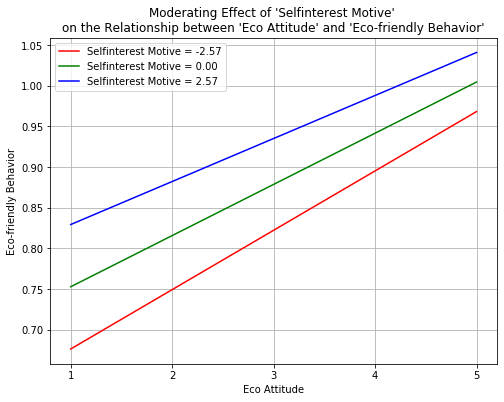

In [122]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, label=f'Selfinterest Motive = {Z_low:.2f}', color='red')
plt.plot(X, Y_mid, label=f'Selfinterest Motive = {Z_mid:.2f}', color='green')
plt.plot(X, Y_high, label=f'Selfinterest Motive = {Z_high:.2f}', color='blue')

plt.xticks(np.arange(1, 6, 1))
plt.xlabel('Eco Attitude')
plt.ylabel('Eco-friendly Behavior')
plt.title("Moderating Effect of 'Selfinterest Motive' \non the Relationship between 'Eco Attitude' and 'Eco-friendly Behavior'")
plt.legend()
plt.grid(True)
plt.show()

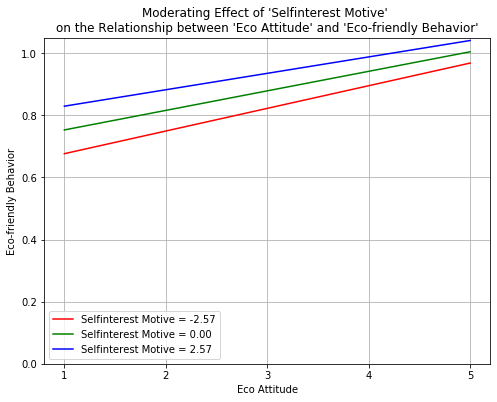

In [123]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, label=f'Selfinterest Motive = {Z_low:.2f}', color='red')
plt.plot(X, Y_mid, label=f'Selfinterest Motive = {Z_mid:.2f}', color='green')
plt.plot(X, Y_high, label=f'Selfinterest Motive = {Z_high:.2f}', color='blue')

plt.ylim(0, 1.05)
plt.xticks(np.arange(1, 6, 1))

plt.xlabel('Eco Attitude')
plt.ylabel('Eco-friendly Behavior')
plt.title("Moderating Effect of 'Selfinterest Motive' \non the Relationship between 'Eco Attitude' and 'Eco-friendly Behavior'")
plt.legend()
plt.grid(True)
plt.show()

###### X->Y (직접효과)

In [118]:
motive_avg = data['motive_selfinterest'].mean()
motive_sd = data['motive_selfinterest'].std()
# predict data
X = np.linspace(1, 5, 100)
Z_low = 0 - motive_sd
Z_mid = 0
Z_high = 0 + motive_sd
## beta
beta_0 = 0.6900
beta_1 = 0.0100
beta_2 = 0.0336
beta_3 = -0.0011

# Y_low = 0.3090 + 0.1119 * X + 0.0156 * Z_low + -0.0074 * (X*Z_low)
# Y_mid = 0.3090 + 0.1119 * X + 0.0156 * Z_mid + -0.0074 * (X*Z_mid)
# Y_high = 0.3090 + 0.1119 * X + 0.0156 * Z_high + -0.0074 * (X*Z_high)

Y_low = beta_0 + beta_1 * X + beta_2 * Z_low + beta_3 * (X*Z_low)
Y_mid = beta_0 + beta_1 * X + beta_2 * Z_mid + beta_3 * (X*Z_mid)
Y_high = beta_0 + beta_1 * X + beta_2 * Z_high + beta_3 * (X*Z_high)

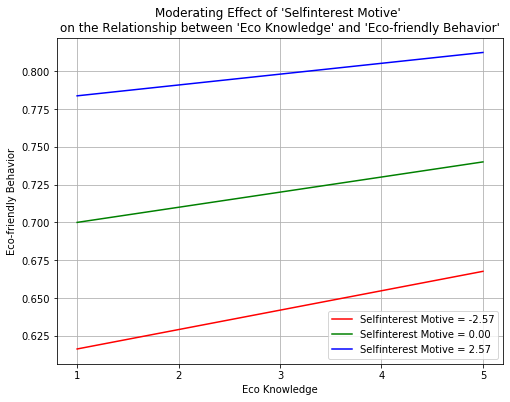

In [119]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, label=f'Selfinterest Motive = {Z_low:.2f}', color='red')
plt.plot(X, Y_mid, label=f'Selfinterest Motive = {Z_mid:.2f}', color='green')
plt.plot(X, Y_high, label=f'Selfinterest Motive = {Z_high:.2f}', color='blue')

plt.xticks(np.arange(1, 6, 1))
plt.xlabel('Eco Knowledge')
plt.ylabel('Eco-friendly Behavior')
plt.title("Moderating Effect of 'Selfinterest Motive' \non the Relationship between 'Eco Knowledge' and 'Eco-friendly Behavior'")
plt.legend()
plt.grid(True)
plt.show()

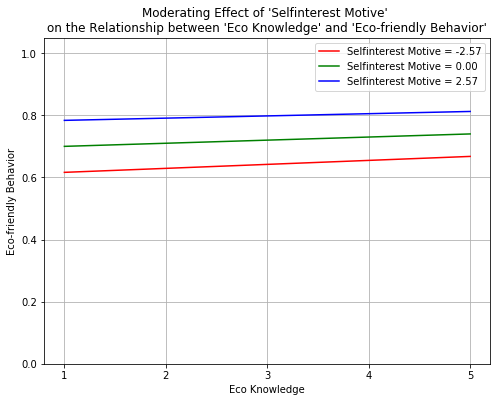

In [120]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, label=f'Selfinterest Motive = {Z_low:.2f}', color='red')
plt.plot(X, Y_mid, label=f'Selfinterest Motive = {Z_mid:.2f}', color='green')
plt.plot(X, Y_high, label=f'Selfinterest Motive = {Z_high:.2f}', color='blue')

plt.ylim(0, 1.05)
plt.xticks(np.arange(1, 6, 1))

plt.xlabel('Eco Knowledge')
plt.ylabel('Eco-friendly Behavior')
plt.title("Moderating Effect of 'Selfinterest Motive' \non the Relationship between 'Eco Knowledge' and 'Eco-friendly Behavior'")
plt.legend()
plt.grid(True)
plt.show()

##### Socialinterest
M->Y에서 조절효과

In [201]:
motive_avg = data['motive_socialinterest'].mean()
motive_sd = data['motive_socialinterest'].std()
# predict data
X = np.linspace(1, 5, 100)
Z_low = 0 - motive_sd
Z_mid = 0
Z_high = 0 + motive_sd
## beta
beta_0 = 0.6878
beta_1 = 0.0653
beta_2 = 0.0278
beta_3 = -0.0042

# Y_low = 0.3090 + 0.1119 * X + 0.0156 * Z_low + -0.0074 * (X*Z_low)
# Y_mid = 0.3090 + 0.1119 * X + 0.0156 * Z_mid + -0.0074 * (X*Z_mid)
# Y_high = 0.3090 + 0.1119 * X + 0.0156 * Z_high + -0.0074 * (X*Z_high)

Y_low = beta_0 + beta_1 * X + beta_2 * Z_low + beta_3 * (X*Z_low)
Y_mid = beta_0 + beta_1 * X + beta_2 * Z_mid + beta_3 * (X*Z_mid)
Y_high = beta_0 + beta_1 * X + beta_2 * Z_high + beta_3 * (X*Z_high)

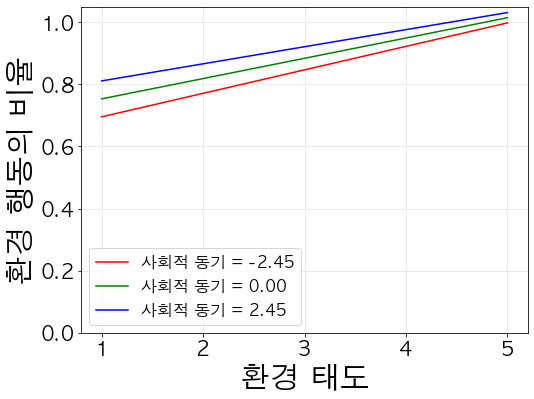

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, label=f'사회적 동기 = {Z_low:.2f}', color='red')
plt.plot(X, Y_mid, label=f'사회적 동기 = {Z_mid:.2f}', color='green')
plt.plot(X, Y_high, label=f'사회적 동기 = {Z_high:.2f}', color='blue')

plt.xticks(np.arange(1, 6, 1))

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('환경 태도', fontsize=30)
plt.ylabel('환경 행동의 비율', fontsize=30)
# plt.title("Moderating Effect of 'Socialinterest Motive' \non the Relationship between 'Eco Attitude' and 'Eco-friendly Behavior'")
plt.legend(fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()

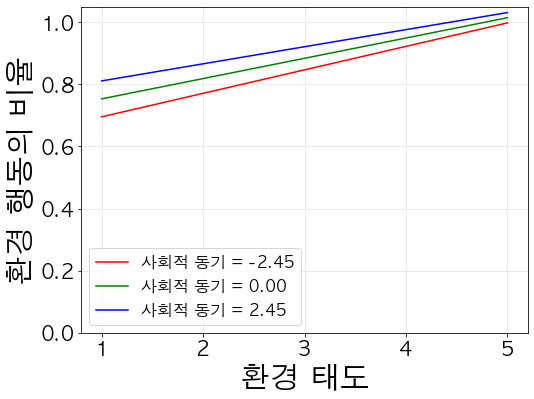

In [203]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, label=f'사회적 동기 = {Z_low:.2f}', color='red')
plt.plot(X, Y_mid, label=f'사회적 동기 = {Z_mid:.2f}', color='green')
plt.plot(X, Y_high, label=f'사회적 동기 = {Z_high:.2f}', color='blue')

plt.ylim(0, 1.05)
plt.xticks(np.arange(1, 6, 1))

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('환경 태도', fontsize=30)
plt.ylabel('환경 행동의 비율', fontsize=30)
# plt.title("Moderating Effect of 'Socialinterest Motive' \non the Relationship between 'Eco Attitude' and 'Eco-friendly Behavior'")
plt.legend(fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()

M->Y & X->Y에서 조절효과
###### M->Y

In [124]:
motive_avg = data['motive_socialinterest'].mean()
motive_sd = data['motive_socialinterest'].std()
# predict data
X = np.linspace(1, 5, 100)
Z_low = 0 - motive_sd
Z_mid = 0
Z_high = 0 + motive_sd
## beta
beta_0 = 0.6888
beta_1 = 0.0659
beta_2 = 0.0275
beta_3 = -0.0039

# Y_low = 0.3090 + 0.1119 * X + 0.0156 * Z_low + -0.0074 * (X*Z_low)
# Y_mid = 0.3090 + 0.1119 * X + 0.0156 * Z_mid + -0.0074 * (X*Z_mid)
# Y_high = 0.3090 + 0.1119 * X + 0.0156 * Z_high + -0.0074 * (X*Z_high)

Y_low = beta_0 + beta_1 * X + beta_2 * Z_low + beta_3 * (X*Z_low)
Y_mid = beta_0 + beta_1 * X + beta_2 * Z_mid + beta_3 * (X*Z_mid)
Y_high = beta_0 + beta_1 * X + beta_2 * Z_high + beta_3 * (X*Z_high)

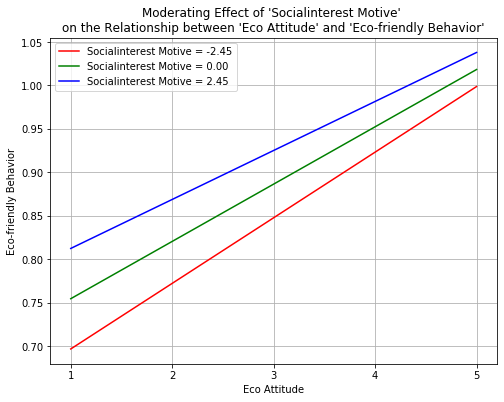

In [125]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, label=f'Socialinterest Motive = {Z_low:.2f}', color='red')
plt.plot(X, Y_mid, label=f'Socialinterest Motive = {Z_mid:.2f}', color='green')
plt.plot(X, Y_high, label=f'Socialinterest Motive = {Z_high:.2f}', color='blue')

plt.xticks(np.arange(1, 6, 1))
plt.xlabel('Eco Attitude')
plt.ylabel('Eco-friendly Behavior')
plt.title("Moderating Effect of 'Socialinterest Motive' \non the Relationship between 'Eco Attitude' and 'Eco-friendly Behavior'")
plt.legend()
plt.grid(True)
plt.show()

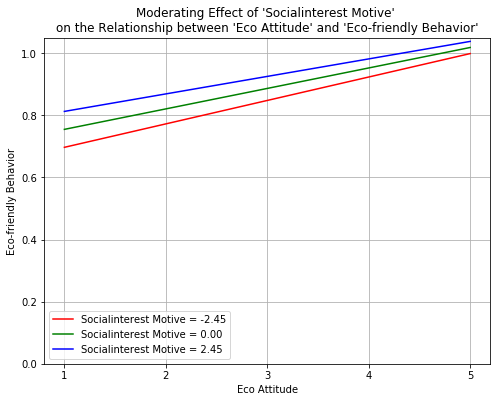

In [126]:
plt.figure(figsize=(8, 6))
plt.plot(X, Y_low, label=f'Socialinterest Motive = {Z_low:.2f}', color='red')
plt.plot(X, Y_mid, label=f'Socialinterest Motive = {Z_mid:.2f}', color='green')
plt.plot(X, Y_high, label=f'Socialinterest Motive = {Z_high:.2f}', color='blue')

plt.ylim(0, 1.05)
plt.xticks(np.arange(1, 6, 1))

plt.xlabel('Eco Attitude')
plt.ylabel('Eco-friendly Behavior')
plt.title("Moderating Effect of 'Socialinterest Motive' \non the Relationship between 'Eco Attitude' and 'Eco-friendly Behavior'")
plt.legend()
plt.grid(True)
plt.show()